In [1]:
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
import requests

In [16]:
url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

Code diatas memiliki fungsi untuk memanggil object bentuk URL yang datanya akan kita gunakan untuk scrapping

In [17]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,'

In [18]:
soup = BeautifulSoup(url_get.content, 'html.parser')

In [19]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


Berikut adalah website yang akan kita gunakan untuk dilakukan webscrapping:

<img src="asset/Main-site.png">

Berikut merupakan sekilas dari tabel yang akan kita scrap sesuai dengan rentang tanggal yang telah ditentukan yaitu mulai dari 1 Januari 2020 hingga 30 Juni 2021:

<img src="asset/data-top.png">
<img src="asset/data-bottom.png">

In [20]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
   <title>
    Ethereum USD Historical Data | CoinGecko
   </title>
   <meta content="Get Ethereum (ETH) USD historical prices." name="description">
  


Selanjutnya kita akan mencari element dari tabel yang akan kita gunakan, yaitu dengan cara hover mouse pointer kita ke bagian atas tabel dan klik kanan lalu pilih 'inspect element'. Berikut merupakan contoh gambar pada saat melakukan inspect element:

<img src="asset/table-element.png">

Terlihat bahwa element yang akan kita pilih sebagai identitas dari tabel tersebut adalah 'class = card-block'

In [23]:
table = soup.find('div', attrs={'class':'card-block'})
print(table.prettify()[1:500])

div class="card-block">
 <div class="coingecko-table table-responsive" data-controller="historical">
  <div class="tw-flex tw-justify-end tw-items-center">
  </div>
  <div class="tw-flex flex-column flex-md-row tw-justify-end tw-items-end align-items-md-center py-2">
   <div class="py-1 pr-md-2 range-links">
    <a class="mx-1" href="/en/coins/ethereum/historical_data/usd?end_date=2021-10-21&amp;start_date=2021-10-14#panel">
     7d
    </a>
    <a class="mx-1" href="/en/coins/ethereum/historic


Selanjutnya kita juga harus mengidentifikasi identitas dari setiap barisnya. Terlihat bahwa identitas dari setiap barisnya adalah 'tr'

<img src="asset/row-element.png">

Namun pada baris yang memiliki nilai (yaitu baris-baris setelah nama kolom) memiliki identitas 'th' dan 'td'. Untuk kasus ini kita hanya akan menggunakan yg beridentitas 'td' karena 'td' memiliki nilai yang kita butuhkan.

<img src="asset/row-element-2.png">

In [66]:
table.find_all(['td'], attrs={'class':'text-center'})

[<td class="text-center">
 $253,607,549,372
 </td>,
 <td class="text-center">
 $27,149,143,847
 </td>,
 <td class="text-center">
 $2,169.40
 </td>,
 <td class="text-center">
 N/A
 </td>,
 <td class="text-center">
 $243,040,539,437
 </td>,
 <td class="text-center">
 $30,629,329,806
 </td>,
 <td class="text-center">
 $2,087.52
 </td>,
 <td class="text-center">
 $2,169.40
 </td>,
 <td class="text-center">
 $229,354,016,311
 </td>,
 <td class="text-center">
 $24,316,408,028
 </td>,
 <td class="text-center">
 $1,973.93
 </td>,
 <td class="text-center">
 $2,087.52
 </td>,
 <td class="text-center">
 $209,989,265,221
 </td>,
 <td class="text-center">
 $24,249,510,321
 </td>,
 <td class="text-center">
 $1,817.05
 </td>,
 <td class="text-center">
 $1,973.93
 </td>,
 <td class="text-center">
 $213,871,849,532
 </td>,
 <td class="text-center">
 $25,981,381,067
 </td>,
 <td class="text-center">
 $1,833.46
 </td>,
 <td class="text-center">
 $1,817.05
 </td>,
 <td class="text-center">
 $231,644,258,7

In [43]:
table.find_all(['th','td'], attrs={'class':'font-semibold text-center'})[0].text

'2021-06-30'

In [85]:
#row = table.find_all(['th','td'], attrs={'class':'text-center'})[5:]
#row_length = len(row)
#row_length

2735

In [121]:
row = table.find_all('tr')
row_length = len(row)
row_length

548

jumlah baris pada tabel yang akan kita gunakan adalah sebanyak 548 (termasuk nama kolom)

In [105]:
market_cap = x[0].text.strip()
market_cap



'$253,607,549,372'

In [114]:
table.find_all('th', attrs = {'class':'font-semibold text-center'})#[0].text

[<th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>,
 <th class="font-semibold text-center" scope="row">2021-06-26</th>,
 <th class="font-semibold text-center" scope="row">2021-06-25</th>,
 <th class="font-semibold text-center" scope="row">2021-06-24</th>,
 <th class="font-semibold text-center" scope="row">2021-06-23</th>,
 <th class="font-semibold text-center" scope="row">2021-06-22</th>,
 <th class="font-semibold text-center" scope="row">2021-06-21</th>,
 <th class="font-semibold text-center" scope="row">2021-06-20</th>,
 <th class="font-semibold text-center" scope="row">2021-06-19</th>,
 <th class="font-semibold text-center" scope="row">2021-06-18</th>,
 <th class="font-semibold text-center" scope="row">2021-06-17</th>,
 <th class="font-semibold text-center" scope="ro

Selanjutnya kita akan membuat fungsi looping dengan ketentuan identitas yang sudah kita jelaskan diatas. 
langkah-langkahnya adalah:

    1. Screening identitas baris ('tr') --> didalam konten 'tr' berisikan identitas 'th' dan 'td'
    
    2. Menentukan identitas yang berisi tanggal atau date --> 'th' merupakan identitas dari kolom Date
    
    3. Menentukan identitas yang berisi nilai --> 'td' merupakan identitas dari kolom selain Date
    
    4. Menentukan nilai yang ingin diambil (Market Cap, Volume, Open, Close) --> merupakan index list dari identitas 'td' yang telah kita tentukan. Market cap: [0], Volume: [1], Open: [2], Close: [3]
    
    5. Langkah terakhir adalah mencetak kembali semua identitas yang sudah kita tentukan dengan fungsi temp.append()

In [125]:
temp = [] #init

for i in range(1, row_length):
    
    row = table.find_all('tr')[i]
    period = row.find('th').text
    x = row.find_all('td')
    market_cap = x[0].text.strip()
    volume = x[1].text.strip()
    open_value = x[2].text.strip()
    close = x[3].text.strip()
    temp.append((period, market_cap, volume, open_value, close)) 
    
temp

[('2021-06-30', '$253,607,549,372', '$27,149,143,847', '$2,169.40', 'N/A'),
 ('2021-06-29',
  '$243,040,539,437',
  '$30,629,329,806',
  '$2,087.52',
  '$2,169.40'),
 ('2021-06-28',
  '$229,354,016,311',
  '$24,316,408,028',
  '$1,973.93',
  '$2,087.52'),
 ('2021-06-27',
  '$209,989,265,221',
  '$24,249,510,321',
  '$1,817.05',
  '$1,973.93'),
 ('2021-06-26',
  '$213,871,849,532',
  '$25,981,381,067',
  '$1,833.46',
  '$1,817.05'),
 ('2021-06-25',
  '$231,644,258,719',
  '$22,447,489,242',
  '$1,990.08',
  '$1,833.46'),
 ('2021-06-24',
  '$229,518,675,837',
  '$28,098,744,045',
  '$1,971.11',
  '$1,990.08'),
 ('2021-06-23',
  '$216,876,757,209',
  '$38,755,019,937',
  '$1,875.36',
  '$1,971.11'),
 ('2021-06-22',
  '$223,202,708,789',
  '$39,499,960,408',
  '$1,900.12',
  '$1,875.36'),
 ('2021-06-21',
  '$261,478,202,409',
  '$26,235,850,447',
  '$2,251.56',
  '$1,900.12'),
 ('2021-06-20',
  '$253,396,709,039',
  '$20,456,963,375',
  '$2,176.31',
  '$2,251.56'),
 ('2021-06-19',
  '$260,

Terlihat pada output diatas bahwa syntax yang sudah kita jalankan berhasil namun urutan index yang ditampilkan adalah 'ascending' sedangkan yang kita inginkan untuk membuat chart adalah 'descending'.

Maka dari itu fungsi selanjutnya untuk me-reversekan urutan data yang sudah ditampilkan adalah sebagai berikut: 

In [126]:
temp = temp[::-1]
temp

[('2020-01-01', '$14,097,451,632', '$7,103,187,151', '$129.19', '$130.48'),
 ('2020-01-02', '$14,230,588,104', '$6,623,732,041', '$130.48', '$127.05'),
 ('2020-01-03', '$13,859,793,330', '$6,497,297,884', '$127.05', '$133.70'),
 ('2020-01-04', '$14,613,194,776', '$9,655,245,100', '$133.70', '$134.14'),
 ('2020-01-05', '$14,636,213,160', '$6,958,393,690', '$134.14', '$135.01'),
 ('2020-01-06', '$14,738,834,254', '$7,260,645,128', '$135.01', '$143.81'),
 ('2020-01-07', '$15,692,578,635', '$9,514,201,882', '$143.81', '$143.02'),
 ('2020-01-08', '$15,656,491,188', '$9,440,938,788', '$143.02', '$140.27'),
 ('2020-01-09', '$15,364,547,562', '$10,095,847,759', '$140.27', '$137.86'),
 ('2020-01-10', '$14,998,595,868', '$7,280,640,218', '$137.86', '$144.60'),
 ('2020-01-11', '$15,647,071,448', '$10,273,370,788', '$144.60', '$142.18'),
 ('2020-01-12', '$15,564,837,468', '$9,737,605,323', '$142.18', '$145.42'),
 ('2020-01-13', '$15,859,031,094', '$8,488,793,478', '$145.42', '$143.59'),
 ('2020-01

Terlihat bahwa data raw yang kita inginkan sudah memiliki urutan yang benar dan siap kita jadikan sebagai data frame. 

Kita gunakan fungsi pd.DataFrame dan tentukan nama untuk dijadikan nama kolom dengan syntax sebagai berikut:

In [129]:
df = pd.DataFrame(temp, columns = ('Date','Market Cap','Volume','Open','Close' ))
df

,Date,Market Cap,Volume,Open,Close
0,2020-01-01,"$14,097,451,632","$7,103,187,151",$129.19,$130.48
1,2020-01-02,"$14,230,588,104","$6,623,732,041",$130.48,$127.05
2,2020-01-03,"$13,859,793,330","$6,497,297,884",$127.05,$133.70
3,2020-01-04,"$14,613,194,776","$9,655,245,100",$133.70,$134.14
4,2020-01-05,"$14,636,213,160","$6,958,393,690",$134.14,$135.01
...,...,...,...,...,...
542,2021-06-26,"$213,871,849,532","$25,981,381,067","$1,833.46","$1,817.05"
543,2021-06-27,"$209,989,265,221","$24,249,510,321","$1,817.05","$1,973.93"
544,2021-06-28,"$229,354,016,311","$24,316,408,028","$1,973.93","$2,087.52"
545,2021-06-29,"$243,040,539,437","$30,629,329,806","$2,087.52","$2,169.40"


Pada kasus ini kita hanya gunakan kolom Date dan Volume saja untuk di visualisasikan dalam bentuk line plot

In [131]:
df_ready = df[['Date','Volume']]
df_ready

,Date,Volume
0,2020-01-01,"$7,103,187,151"
1,2020-01-02,"$6,623,732,041"
2,2020-01-03,"$6,497,297,884"
3,2020-01-04,"$9,655,245,100"
4,2020-01-05,"$6,958,393,690"
...,...,...
542,2021-06-26,"$25,981,381,067"
543,2021-06-27,"$24,249,510,321"
544,2021-06-28,"$24,316,408,028"
545,2021-06-29,"$30,629,329,806"


Karena dataframe yang kita simpan masih merupakan data mentah dan setiap kolomnya belum memiliki class yang sesuai, maka kita akan wrangling data yang kita gunakan.

Kolom Date --> (datetime64)

Kolom Volume --> hilangkan atribut '$' --> hilangkan atribut ',' --> jadikan (float64)

In [138]:
df_ready['Date'] = df_ready['Date'].astype('datetime64')
df_ready.dtypes

/var/folders/m0/qx461j_j08s3mysm128rzm400000gn/T/ipykernel_1458/820169988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ready['Date'] = df_ready['Date'].astype('datetime64')


Date      datetime64[ns]
Volume            object
dtype: object

In [141]:
df_ready['Volume'] = df_ready['Volume'].str.replace('$','').str.replace(',','')

/var/folders/m0/qx461j_j08s3mysm128rzm400000gn/T/ipykernel_1458/3705114349.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_ready['Volume'] = df_ready['Volume'].str.replace('$','').str.replace(',','')
/var/folders/m0/qx461j_j08s3mysm128rzm400000gn/T/ipykernel_1458/3705114349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ready['Volume'] = df_ready['Volume'].str.replace('$','').str.replace(',','')


In [142]:
df_ready['Volume'] = df_ready['Volume'].astype('float64')

/var/folders/m0/qx461j_j08s3mysm128rzm400000gn/T/ipykernel_1458/3380812903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ready['Volume'] = df_ready['Volume'].astype('float64')


Kolom pada data yang akan kita gunakan sudah memiliki class yang sesuai namun kita harus menjadikan kolom Date sebagai index untuk memvisualisasikannya dalam bentuk line plot

In [146]:
df_ready = df_ready.set_index('Date')

<AxesSubplot:xlabel='Date'>

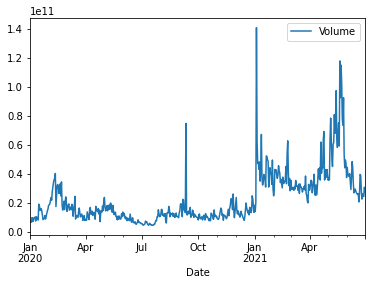

In [149]:
df_ready.plot(kind = 'line')

Terlihat bahwa nilai Volume secara keseluruhan mengalami kenaikan namun tidak signifikan.

Terdapat beberapa nilai yang memiliki Outlier yaitu pada bulan September 2020, Januari 2021, dan Mei 2021. 

Pada bulan April 2020 dan 2021 mengalami jenis fluktuasi yang sama berdasarkan dari bulan sebelumnya pada tahunnya. 